## Summary

Avocado dataset

Avacado is a fruit consumed by people heavily in United states. 

Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the city or region and find the average price .

Task: Classification /Regression


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
df=pd.read_csv("Avacado.csv",parse_dates=['Date'])
df.head(10)

,Sno.,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-08-11,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-01-11,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
#Check the datatypes
df.dtypes

Sno.                     int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [4]:
#Check the data shape
df.shape
#There are 1517 rows and 14 attributes in the dataset

(1517, 14)

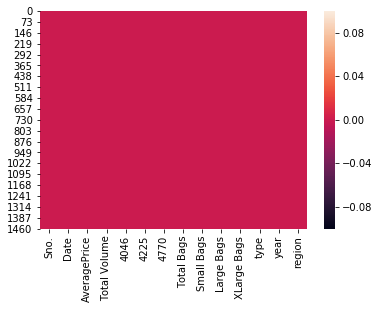

In [5]:
#check for the missing values
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()
#There are no missing values in the dataset

Sno.            0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
#Dropping the column S.No. which is not required
df=df.drop(['Sno.'],axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Univariate Analysis

In [8]:
#Checking the minimum, maximum and mean price of Avacado
print("The minimum price of Avacado is", df['AveragePrice'].min())
print("The maximum price of Avacado is", df['AveragePrice'].max())
print("The average price of Avacado is", round(df['AveragePrice'].mean(),2))

The minimum price of Avacado is 0.49
The maximum price of Avacado is 1.68
The average price of Avacado is 1.07


In [9]:
#Checking the unique no of type captured along with their counts
df['type'].value_counts()
#There is only one category 'conventional' in the type column

conventional    1517
Name: type, dtype: int64

In [10]:
#Checking the unique no of regions captured along with their counts
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

#### checking the distribution

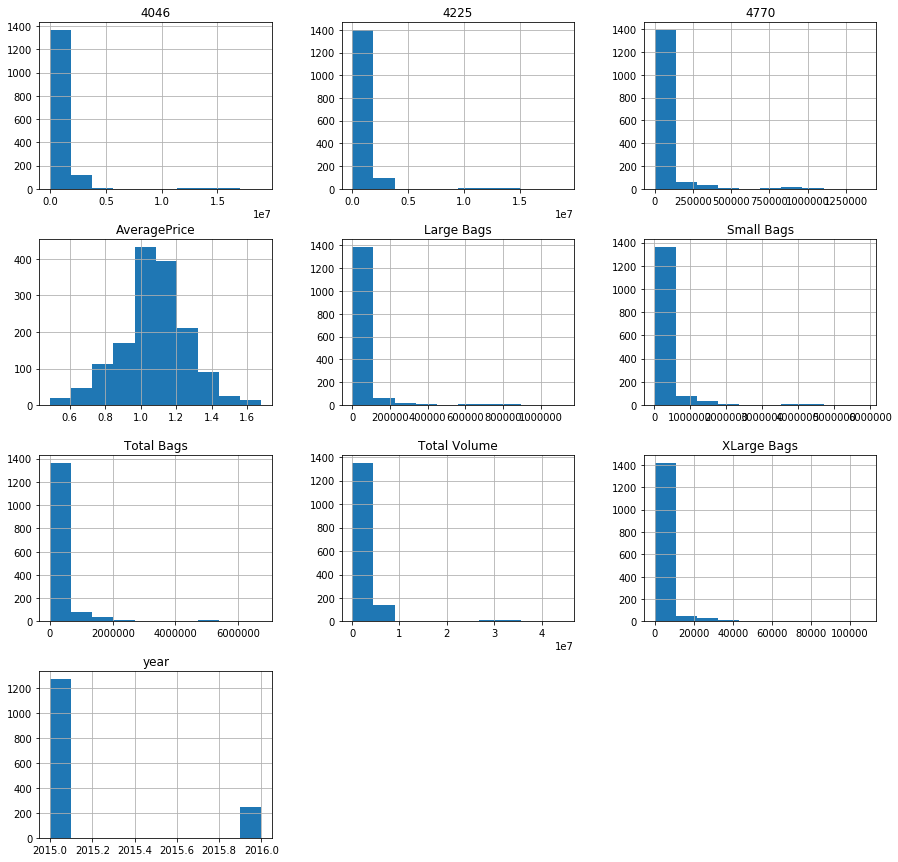

In [11]:

df.hist(bins=10,figsize=(15,15))
plt.show()

In [12]:
#Most of the columns are not evenly distributed and they need to be treated before fitting into model

#### Checking outliers using boxplot

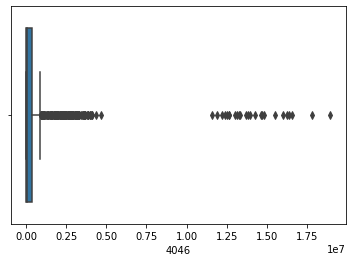

In [13]:
sns.boxplot(df['4046'])

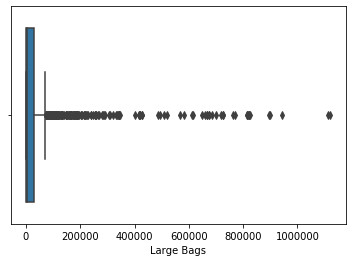

In [14]:
sns.boxplot(df['Large Bags'])

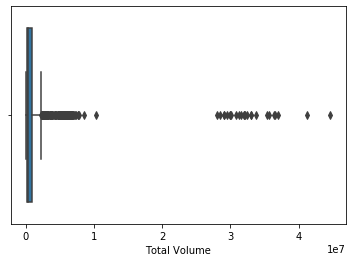

In [15]:
sns.boxplot(df['Total Volume'])


Observations
There are many outliers which needs to be treated later.

### Bivariate Analysis

#### Checking the relationship between features using scatterplot

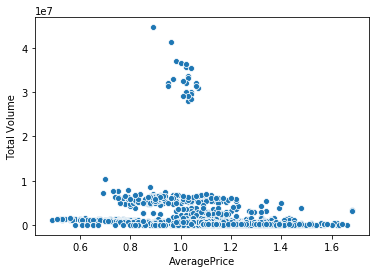

In [16]:
sns.scatterplot(x='AveragePrice', y='Total Volume', data=df)

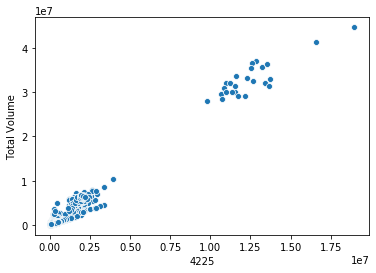

In [17]:
sns.scatterplot(x='4225', y='Total Volume', data=df)

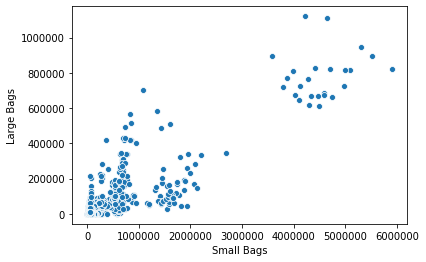

In [18]:
sns.scatterplot(x='Small Bags', y='Large Bags', data=df)

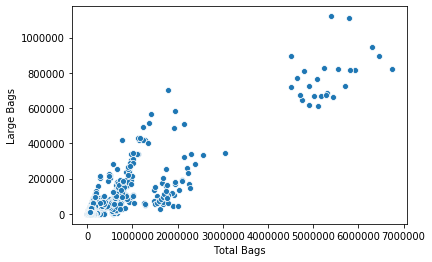

In [19]:
sns.scatterplot(x='Total Bags', y='Large Bags', data=df)

In [20]:
#Few columns show a positive correlation.

### Correlation

In [21]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


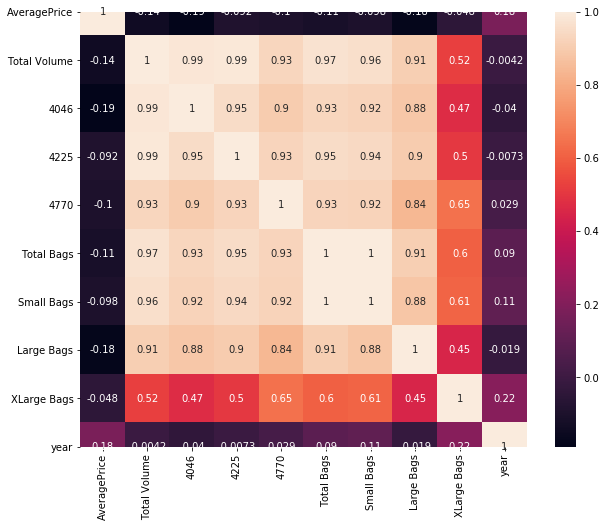

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Observations:
1. Apart from XLarge Bags, year and Average Price, all other columns are positively correlated to each other 

### Statistical Analysis

In [23]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [24]:
region=df.groupby('region').mean()
region.sort_values(by='Total Volume',ascending=False)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
TotalUS,1.011600,3.293714e+07,1.422580e+07,1.243888e+07,950091.078000,5.322368e+06,4.519090e+06,779546.107600,23732.280400,2015.000000
California,1.055921,6.035277e+06,2.410017e+06,1.984823e+06,225314.512500,1.415122e+06,1.286774e+06,109555.190526,18792.960132,2015.684211
West,0.940833,5.574939e+06,2.348945e+06,2.040127e+06,124529.191111,1.061338e+06,7.447474e+05,315172.970278,1417.661111,2015.000000
SouthCentral,0.818718,5.496995e+06,3.077958e+06,1.625283e+06,109997.714359,6.837558e+05,5.549597e+05,123663.470256,5132.639487,2015.000000
Northeast,1.236667,3.465864e+06,1.073529e+05,2.427952e+06,7251.636667,9.233073e+05,8.325909e+05,90716.120000,0.272500,2015.000000
GreatLakes,1.107222,3.276358e+06,5.652089e+05,1.720079e+06,300844.177222,6.902264e+05,5.701240e+05,103211.250556,16891.117778,2015.000000
Southeast,1.091111,3.055239e+06,2.195695e+06,2.826350e+05,23959.242222,5.529500e+05,3.165600e+05,236389.612222,0.331111,2015.000000
LosAngeles,0.863333,2.732180e+06,1.849780e+06,5.559236e+05,60827.640000,2.656486e+05,2.331338e+05,29588.213333,2926.593333,2015.000000
Midsouth,1.081111,2.355099e+06,5.020956e+05,1.163150e+06,188945.888889,5.009069e+05,4.444993e+05,54315.115000,2092.557222,2015.000000


Regionwise average Total Volume sorted by Total Volume by descending order is given above. 
Highest sales was recorded in TotalUS, followed by California, West and so on 

In [25]:
year=df.groupby('year').mean()
year

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
year,,,,,,,,,
2015,1.060110,1.610065e+06,681160.770126,616787.513780,48630.489803,263486.649244,218407.048992,43615.506961,1464.093291
2016,1.151498,1.559787e+06,467907.936154,583929.347895,59532.042389,448417.955992,404909.278664,37636.822105,5871.855223


Observations
1. The average price of Avacado has increased from 1.06 in 2015 to 1.15 in 2016.
2. The Total Volume of sales in 2015 was higher than 2016.
3. In 2015, the sales of 4046 and 4225 was higher than in 2016.
4. In 2016, the sales of 4770 was higher than in 2015.
5. The total bags, small bags, XLarge Bags sold were higher in 2016 than in 2015.
6. The Large bags sold were higher in 2015 than in 2016.

### Pre-processing Data

In [26]:
#dropping the type column has it contains only one value.
df=df.drop('type',axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [27]:
#Using LabelEncoder to convert the categorical data into numerical
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['region']=pd.DataFrame(lb.fit_transform(df['region']))
df['Date']=pd.DataFrame(lb.fit_transform(df['Date']))
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,22,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,46,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


### Removing the skewness
We need to remove the skewness in the data if any

In [28]:
df.skew()

Date            0.961779
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [29]:
for i in df.columns:
    if df.skew()[i]>0.55:
        df[i]=np.log1p(df[i])

In [30]:
df.skew()

Date           -1.057323
AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region          0.288146
dtype: float64

In [31]:
#removing the skewness further by using sqrt function
for i in df.columns:
    if df.skew()[i]>0.55:
        df[i]=np.sqrt(df[i])

In [32]:
df.skew()
#This has reduced skewness further.

Date           -1.057323
AveragePrice   -0.109444
Total Volume    0.544746
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.518376
Small Bags      0.547589
Large Bags     -0.912766
XLarge Bags     0.375426
year            1.828332
region          0.288146
dtype: float64

### Removing the outliers

In [33]:
#Importing necessary libraries
from scipy.stats import zscore
print("The shape before removing outliers", df.shape)
threshold=3
z=np.abs(zscore(df))
df=df[(z<threshold).all(axis=1)]
print("The shape after removing outliers", df.shape)

The shape before removing outliers (1517, 12)
The shape after removing outliers (1488, 12)


In [34]:
#Creating one more copy of the dataframe for future use
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,3.951244,1.33,3.327213,6.944801,10.905146,3.895080,3.011782,3.009992,4.545951,0.0,2.758418,0
1,3.931826,1.35,3.303463,6.515127,10.706381,4.083115,3.026506,3.024802,4.589955,0.0,2.758418,0
2,3.912023,0.93,3.417647,6.679222,11.600485,4.879007,3.000887,2.998764,4.645736,0.0,2.758418,0
3,3.135494,1.08,3.358142,7.032624,11.184108,4.298373,2.944097,2.940140,4.903495,0.0,2.758418,0
4,3.850148,1.28,3.292473,6.848515,10.688288,4.340944,2.954636,2.949134,5.291746,0.0,2.758418,0


The problem has to be solved in both the ways using the classifier and regressor:-
1. Classifier - where we predict the region for the dataset
2. Regressor - where we predict the Average price of Avacado

We need to separate the input and output variables before we apply the standard scaler

### Separating the input and output variables for classification

In [35]:
#Lets name variables for classification x1 and y1 and variables for regression x2 and y2
x1=df.iloc[:,0:-1]
y1=pd.DataFrame(df.iloc[:,-1])
print(x1.shape)
print(y1.shape)

(1488, 11)
(1488, 1)


# Classification Model Development

Let us first develop proper model for developing Classification problem

### Using Standardscaler 

In [36]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1))
x1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.824877,1.363584,-1.400041,-1.824457,-0.562854,-1.822859,-1.774515,-1.613448,-0.964635,-0.903429,-0.441793
1,0.802574,1.471156,-1.521125,-2.008567,-0.679589,-1.749501,-1.701262,-1.541093,-0.951754,-0.903429,-0.441793
2,0.779829,-0.787846,-0.938975,-1.938254,-0.154480,-1.439001,-1.828721,-1.668306,-0.935427,-0.903429,-0.441793
3,-0.112064,0.018941,-1.242354,-1.786826,-0.399019,-1.665523,-2.111271,-1.954714,-0.859977,-0.903429,-0.441793
4,0.708761,1.094656,-1.577157,-1.865715,-0.690215,-1.648915,-2.058836,-1.910776,-0.746332,-0.903429,-0.441793


#### deriving the best random_state for splitting the data into train and test

In [37]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def max_acc_score(reg,x1,y1):
    max_acc_score=0
    for r_state in range(42,101):
        train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,random_state=r_state,test_size=0.20)
        reg.fit(train_x1,train_y1)
        pred=reg.predict(test_x1)
        acc_score=accuracy_score(test_y1,pred)
        print("The accuracy score achieved at r_state", r_state, "is", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The max accuracy score ", max_acc_score, "is achieved at", final_r_state)
    return final_r_state

In [38]:
#Checking the DecisionTreeClassifier for the above
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

max_acc_score(dt,x1,y1)

The accuracy score achieved at r_state 42 is 0.8758389261744967
The accuracy score achieved at r_state 43 is 0.8791946308724832
The accuracy score achieved at r_state 44 is 0.8859060402684564
The accuracy score achieved at r_state 45 is 0.8557046979865772
The accuracy score achieved at r_state 46 is 0.87248322147651
The accuracy score achieved at r_state 47 is 0.889261744966443
The accuracy score achieved at r_state 48 is 0.8859060402684564
The accuracy score achieved at r_state 49 is 0.8825503355704698
The accuracy score achieved at r_state 50 is 0.8691275167785235
The accuracy score achieved at r_state 51 is 0.8691275167785235
The accuracy score achieved at r_state 52 is 0.8959731543624161
The accuracy score achieved at r_state 53 is 0.8456375838926175
The accuracy score achieved at r_state 54 is 0.8959731543624161
The accuracy score achieved at r_state 55 is 0.8859060402684564
The accuracy score achieved at r_state 56 is 0.912751677852349
The accuracy score achieved at r_state 57 is

74

In [39]:
#Lets check the cross val score for the same
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cross_score=cross_val_score(dt,x1,y1,cv=5,scoring='accuracy').mean()
cross_score

0.811993156868815

In [40]:
#We need to finalise the train and test data
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,random_state=82,test_size=0.20)
print(train_x1.shape)
print(train_y1.shape)
print(test_x1.shape)
print(test_y1.shape)

(1190, 11)
(1190, 1)
(298, 11)
(298, 1)


We need to check the performance of other modules and their scores. For the same we need to use GridSearchCV to select best parameters for the models

### GridSearchCV for selecting best parameters

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x1,train_y1)
gdkn.best_params_


{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x1,train_y1)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [43]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x1,train_y1)
gdsv.best_params_

{'C': 10, 'kernel': 'linear'}

In [44]:
#After obtaining best parameters, we should now check the models

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

score=[]
cv=[]


algorithms=[KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='distance'), DecisionTreeClassifier(criterion= 'gini', splitter= 'best'), SVC(C=10, kernel='linear')]

for i in algorithms:
    print(i)
    i.fit(train_x1,train_y1)
    pred=i.predict(test_x1)
    accscore=accuracy_score(test_y1,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x1,y1,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y1,pred))
    print()
    print(confusion_matrix(test_y1,pred))
    print()
    print()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

The accuracy score is  0.8859060402684564

The cross val score is 0.8514614789840105

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.88      0.78      0.82         9
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        10
           4       0.92      1.00      0.96        11
           5       1.00      0.83      0.91         6
           6       0.93      0.93      0.93        15
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         4
           9       0.86      1.00      0.92        12
          10       0.50      0.67      0.57         3
          11       0.86      1.00      0.92         6
          12       1.0

In [46]:
result=pd.DataFrame({'Model':[KNeighborsClassifier, DecisionTreeClassifier, SVC],'Accuracy_Score':score,'Cross_val_score':cv})
result

,Model,Accuracy_Score,Cross_val_score
0,<class 'sklearn.neighbors.classification.KNeig...,0.885906,0.851461
1,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.895973,0.814993
2,<class 'sklearn.svm.classes.SVC'>,0.959732,0.927778


By comparing the above results, we can conclude that SVC is the best model which is giving best results with good cross val score

In [47]:
#Let us finalise the SVC
sv=SVC(C=10, kernel='linear')
sv.fit(train_x1,train_y1)
pred=sv.predict(test_x1)
acc_score=accuracy_score(test_y1,pred)
crossval=cross_val_score(sv,x1,y1,cv=5,scoring='accuracy').mean()
print("The accuracy score is", acc_score)
print("The cross validation score is", crossval)
pd.DataFrame(pred).to_csv("Project3_Avacado_Classification_predictions_csv")

The accuracy score is 0.959731543624161
The cross validation score is 0.9277782836667866


In [48]:
from sklearn.externals import joblib
joblib.dump(sv,'Avacado_classifier.pkl')

['Avacado_classifier.pkl']


# Regression Model development

### Separating the input and output variables for regression
We need to predict the Average price of Avacados and we will use regression models for the same

In [49]:
x2=df.drop(['AveragePrice'],axis=1)
y2=pd.DataFrame(df['AveragePrice'])
print(x2.shape)
print(y2.shape)
x2.head()

(1488, 11)
(1488, 1)


,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,3.951244,3.327213,6.944801,10.905146,3.895080,3.011782,3.009992,4.545951,0.0,2.758418,0
1,3.931826,3.303463,6.515127,10.706381,4.083115,3.026506,3.024802,4.589955,0.0,2.758418,0
2,3.912023,3.417647,6.679222,11.600485,4.879007,3.000887,2.998764,4.645736,0.0,2.758418,0
3,3.135494,3.358142,7.032624,11.184108,4.298373,2.944097,2.940140,4.903495,0.0,2.758418,0
4,3.850148,3.292473,6.848515,10.688288,4.340944,2.954636,2.949134,5.291746,0.0,2.758418,0


In [50]:
#using standardscaler to scale the input
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x2=pd.DataFrame(scaler.fit_transform(x2))
x2.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.824575,0.081983,0.075379,0.374052,0.203101,0.147343,0.147977,0.326559,0.0,0.0,0.0
1,0.819661,0.056644,0.034628,0.352301,0.217787,0.160510,0.161424,0.329720,0.0,0.0,0.0
2,0.814649,0.178473,0.050191,0.450145,0.279950,0.137600,0.137781,0.333727,0.0,0.0,0.0
3,0.618121,0.114983,0.083708,0.404580,0.234600,0.086813,0.084551,0.352243,0.0,0.0,0.0
4,0.798989,0.044917,0.066247,0.350321,0.237925,0.096237,0.092717,0.380133,0.0,0.0,0.0


In [51]:

### selecting the best random_state for spiltting the data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def max_r2_score(reg,x2,y2):
    max_r2_score=0
    for r_state in range(42,101):
        train_x2,test_x2,train_y2,test_y2=train_test_split(x2,y2,random_state=r_state,test_size=0.20)
        reg.fit(train_x2,train_y2)
        pred=reg.predict(test_x2)
        r2score=r2_score(test_y2,pred)
        print("The r2 score achieved at r_state", r_state, "is", r2score)
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("The max r2 score ", max_r2_score, "is achieved at", final_r_state)
    return final_r_state



In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
max_r2_score(lr,x2,y2)

The r2 score achieved at r_state 42 is 0.3349369752882184
The r2 score achieved at r_state 43 is 0.40103182967797457
The r2 score achieved at r_state 44 is 0.36089464782668346
The r2 score achieved at r_state 45 is 0.4092637702267995
The r2 score achieved at r_state 46 is 0.3612725418139918
The r2 score achieved at r_state 47 is 0.394862177028399
The r2 score achieved at r_state 48 is 0.4205743370627566
The r2 score achieved at r_state 49 is 0.37402401594851387
The r2 score achieved at r_state 50 is 0.3482496544431003
The r2 score achieved at r_state 51 is 0.291451906561934
The r2 score achieved at r_state 52 is 0.39218845822070036
The r2 score achieved at r_state 53 is 0.3620936657579572
The r2 score achieved at r_state 54 is 0.4548664653943316
The r2 score achieved at r_state 55 is 0.3709121988777653
The r2 score achieved at r_state 56 is 0.33410018854954493
The r2 score achieved at r_state 57 is 0.4129490162997891
The r2 score achieved at r_state 58 is 0.42059639142221017
The r2 sco

78

In [53]:
#Lets check the cross validation score for the same
cross_score=cross_val_score(lr,x2,y2,cv=5,scoring='r2').mean()
cross_score

0.10968730845968777

In [54]:
#Finalising the train test data
train_x2,test_x2,train_y2,test_y2=train_test_split(x2,y2,random_state=78,test_size=0.20)

In [55]:
#Since we are getting low scores, we need to check other models and use Gridsearchcv to derive best parameters out of it

In [56]:
#using GridSearchCV to select best parameter for the models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x2,train_y2)
gdk.best_params_

{'n_neighbors': 1}

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x2,train_y2)
gdd.best_params_

{'criterion': 'mse'}

In [58]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x2,train_y2)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


score=[]
cv=[]
Mean=[]
Root=[]

models=[lr,KNeighborsRegressor(n_neighbors=1),DecisionTreeRegressor(criterion='mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x2,train_y2)
    pred=i.predict(test_x2)
    r2score=r2_score(test_y2,pred)
    score.append(r2score)
    print(i)
    print("")
    print("The r2 score is ", r2score)
    cross=cross_val_score(i,x2,y2,cv=5,scoring='r2').mean()
    cv.append(cross)
    print("")
    print("The cross validation score is", cross)
    print()
    Meanerror=mean_absolute_error(test_y2,pred)
    Mean.append(Meanerror)
    print("The mean absolute error is ", Meanerror)
    rmse=np.sqrt(Meanerror)
    Root.append(rmse)
    print()
    print("The root mean square error is", rmse)
    print()
  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The r2 score is  0.4609120685842786

The cross validation score is 0.10968730845968777

The mean absolute error is  0.10634144858539105

The root mean square error is 0.3261003658160951

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

The r2 score is  0.5563988435188993

The cross validation score is -0.23056657440323222

The mean absolute error is  0.08033557046979865

The root mean square error is 0.2834353020881461

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

T

In [60]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.460912,0.109687,0.106341,0.326100
1,KNeighborsRegressor,0.556399,-0.230567,0.080336,0.283435
2,DecisionTreeRegressor,0.649131,-0.318645,0.072450,0.269165
3,SVR,0.645347,0.219787,0.086374,0.293895



#The cross val score for all the models are either negative or too low. Let us try regularisation techniques, Lasso and Ridge regressions

### Lasso

In [61]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(train_x2,train_y2)
gdls.best_params_

{'alpha': 0.001}

In [62]:
#Lets check the r2 score for lasso
ls=Lasso(alpha=0.001)
max_r2_score(ls,x2,y2)

The r2 score achieved at r_state 42 is 0.2978048506166052
The r2 score achieved at r_state 43 is 0.3385709912451095
The r2 score achieved at r_state 44 is 0.2832397946237907
The r2 score achieved at r_state 45 is 0.3279976513567008
The r2 score achieved at r_state 46 is 0.2877783856760845
The r2 score achieved at r_state 47 is 0.31911949636474446
The r2 score achieved at r_state 48 is 0.3198762053499735
The r2 score achieved at r_state 49 is 0.323791983962592
The r2 score achieved at r_state 50 is 0.29940486381406584
The r2 score achieved at r_state 51 is 0.25830504505742113
The r2 score achieved at r_state 52 is 0.30903213301933663
The r2 score achieved at r_state 53 is 0.322527646401898
The r2 score achieved at r_state 54 is 0.3831191647307187
The r2 score achieved at r_state 55 is 0.3503644691967095
The r2 score achieved at r_state 56 is 0.31247167938332077
The r2 score achieved at r_state 57 is 0.3350996645533475
The r2 score achieved at r_state 58 is 0.35797682066105385
The r2 sco

54

In [63]:
#Lets check the cross val score
cvscore=cross_val_score(ls,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)


The cross validation score is 0.1290230098148223


### Ridge

In [64]:
#2. Ridge
#Lets check the best parameters for ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(train_x2,train_y2)
grd.best_params_

{'alpha': 0.001}

In [65]:
#Lets check the r2 score for ridge
rd=Ridge(alpha=0.001)
max_r2_score(rd,x2,y2)

The r2 score achieved at r_state 42 is 0.3349836867184254
The r2 score achieved at r_state 43 is 0.401004248868738
The r2 score achieved at r_state 44 is 0.36091384726298215
The r2 score achieved at r_state 45 is 0.40920744212371096
The r2 score achieved at r_state 46 is 0.36118140643152674
The r2 score achieved at r_state 47 is 0.3948675839304757
The r2 score achieved at r_state 48 is 0.4205070604575625
The r2 score achieved at r_state 49 is 0.374041926295985
The r2 score achieved at r_state 50 is 0.3483458268305194
The r2 score achieved at r_state 51 is 0.2914991174138848
The r2 score achieved at r_state 52 is 0.39219299180930045
The r2 score achieved at r_state 53 is 0.3621168501346328
The r2 score achieved at r_state 54 is 0.4548303562829983
The r2 score achieved at r_state 55 is 0.3709851508010469
The r2 score achieved at r_state 56 is 0.334152350116834
The r2 score achieved at r_state 57 is 0.4129106539655264
The r2 score achieved at r_state 58 is 0.42061330897804905
The r2 score

78

In [66]:
#Lets check the cross val score
cvscore=cross_val_score(rd,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.10962701083882856


### Ensemble Techniques

#### Random Forest

In [67]:
#Since the cross validation score is low, we can try to boost the model by using ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [68]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500), 'criterion':('mse','mae')}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x2,train_y2)
gdrf.best_params_

{'criterion': 'mae', 'n_estimators': 100}

In [69]:
#Lets check the r2 score 
rf=RandomForestRegressor(criterion='mae',n_estimators=100)
max_r2_score(rf,x2,y2)

The r2 score achieved at r_state 42 is 0.7905948615593185
The r2 score achieved at r_state 43 is 0.8047444681369773
The r2 score achieved at r_state 44 is 0.8137448268931028
The r2 score achieved at r_state 45 is 0.8218503167844162
The r2 score achieved at r_state 46 is 0.8339804091688447
The r2 score achieved at r_state 47 is 0.8274015449724599
The r2 score achieved at r_state 48 is 0.8434132813197378
The r2 score achieved at r_state 49 is 0.7975752099116467
The r2 score achieved at r_state 50 is 0.7959905783340512
The r2 score achieved at r_state 51 is 0.7594511826154062
The r2 score achieved at r_state 52 is 0.7659126849221732
The r2 score achieved at r_state 53 is 0.8183072417435804
The r2 score achieved at r_state 54 is 0.8271783079852761
The r2 score achieved at r_state 55 is 0.8266535170537518
The r2 score achieved at r_state 56 is 0.7964584087799496
The r2 score achieved at r_state 57 is 0.7795720025003081
The r2 score achieved at r_state 58 is 0.8286427062795944
The r2 score a

74

In [70]:
#Lets check the cross val score
cvscore=cross_val_score(rf,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.26220988313409804


### GradientBoostingRegressor

In [71]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'loss':('ls','lad','huber','quantile'), 'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500,1000), 'criterion':('friedman_mse', 'mse', 'mae')}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x2,train_y2)                                                                                                                                         
gdg.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'ls',
 'n_estimators': 1000}

In [72]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(criterion='friedman_mse',n_estimators=1000,learning_rate=0.01,loss='ls')
max_r2_score(gb,x2,y2)

The r2 score achieved at r_state 42 is 0.7265148111954229
The r2 score achieved at r_state 43 is 0.7187750050757424
The r2 score achieved at r_state 44 is 0.7198291476149477
The r2 score achieved at r_state 45 is 0.7705076366748423
The r2 score achieved at r_state 46 is 0.7404965204433303
The r2 score achieved at r_state 47 is 0.757496890496688
The r2 score achieved at r_state 48 is 0.7556906357169343
The r2 score achieved at r_state 49 is 0.7451833121585196
The r2 score achieved at r_state 50 is 0.7230627997386578
The r2 score achieved at r_state 51 is 0.7032805342376147
The r2 score achieved at r_state 52 is 0.7449377671099391
The r2 score achieved at r_state 53 is 0.767624864506828
The r2 score achieved at r_state 54 is 0.7593424614415873
The r2 score achieved at r_state 55 is 0.7553184902197471
The r2 score achieved at r_state 56 is 0.7179799161383225
The r2 score achieved at r_state 57 is 0.6959904558346014
The r2 score achieved at r_state 58 is 0.7750214974494531
The r2 score ach

74

In [73]:
#Lets check the cross val score
cvscore=cross_val_score(gb,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.261842597948403


### AdaBoostRegressor

In [74]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1),'loss':('linear','square','exponential')}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x2,train_y2)
gad.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 500}

In [75]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=500,learning_rate=0.1,loss='exponential')
max_r2_score(ad,x2,y2)

The r2 score achieved at r_state 42 is 0.6095644687839603
The r2 score achieved at r_state 43 is 0.6160872305372751
The r2 score achieved at r_state 44 is 0.591691024056374
The r2 score achieved at r_state 45 is 0.6180896658963924
The r2 score achieved at r_state 46 is 0.5746953380177998
The r2 score achieved at r_state 47 is 0.6311321838128527
The r2 score achieved at r_state 48 is 0.6007456519901396
The r2 score achieved at r_state 49 is 0.6410055920952922
The r2 score achieved at r_state 50 is 0.5605915999916656
The r2 score achieved at r_state 51 is 0.5737468627779843
The r2 score achieved at r_state 52 is 0.5947278549474562
The r2 score achieved at r_state 53 is 0.6248393436512782
The r2 score achieved at r_state 54 is 0.6365225656810538
The r2 score achieved at r_state 55 is 0.64826242882344
The r2 score achieved at r_state 56 is 0.5755771196324844
The r2 score achieved at r_state 57 is 0.5779649935380848
The r2 score achieved at r_state 58 is 0.6477505919822808
The r2 score achi

74

In [76]:
#Lets check the cross val score
cvscore=cross_val_score(ad,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.31132699504458267


In [77]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.38,0.46,0.85,0.792,0.664],'Cross_val_score':[0.13,0.11,0.262,0.261,0.311]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.380,0.130
1,Ridge,0.460,0.110
2,RandomForestRegressor,0.850,0.262
3,GradientBoostRegressor,0.792,0.261
4,AdaBoostRegressor,0.664,0.311


In [78]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.460912,0.109687,0.106341,0.326100
1,KNeighborsRegressor,0.556399,-0.230567,0.080336,0.283435
2,DecisionTreeRegressor,0.649131,-0.318645,0.072450,0.269165
3,SVR,0.645347,0.219787,0.086374,0.293895


In [80]:
#In regression models, RandomForestRegressor is giving better scores. So we can finalise the same.
train_x2,test_x2,train_y2,test_y2=train_test_split(x2,y2,random_state=74,test_size=0.20)
rf=RandomForestRegressor(criterion='mae',n_estimators=100)
rf.fit(train_x2,train_y2)
predrf=rf.predict(test_x2)
r2score=r2_score(test_y2,predrf)
print("The r2 score is", r2score)
crosscore=cross_val_score(rf,x2,y2,cv=5,scoring='r2').mean()
print("The cross val score is", crosscore)
pd.DataFrame(pred).to_csv("Project3_Avacado_predictions.csv")

The r2 score is 0.8477283229833212
The cross val score is 0.2744440856288592


In [81]:
#saving the finalised model
from sklearn.externals import joblib
joblib.dump(rf,'Avacado_Regression.pkl')

['Avacado_Regression.pkl']